In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df_car=pd.read_excel("car data.xlsx")

In [3]:
df_car.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   company        301 non-null    object 
 2   Year           301 non-null    int64  
 3   Selling_Price  301 non-null    float64
 4   Present_Price  301 non-null    float64
 5   Kms_Driven     301 non-null    int64  
 6   Fuel_Type      301 non-null    object 
 7   Seller_Type    301 non-null    object 
 8   Transmission   301 non-null    object 
 9   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 23.6+ KB


In [5]:
df_car.isnull().sum()

Car_Name         0
company          0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df_car.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df_car.columns

Index(['Car_Name', 'company', 'Year', 'Selling_Price', 'Present_Price',
       'Kms_Driven', 'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
print(df_car['Seller_Type'].value_counts())

print(df_car['Transmission'].value_counts())

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [9]:
fuel_type=df_car['Fuel_Type']
seller_type=df_car['Seller_Type']
transmission_type=df_car['Transmission']
selling_price=df_car['Transmission']


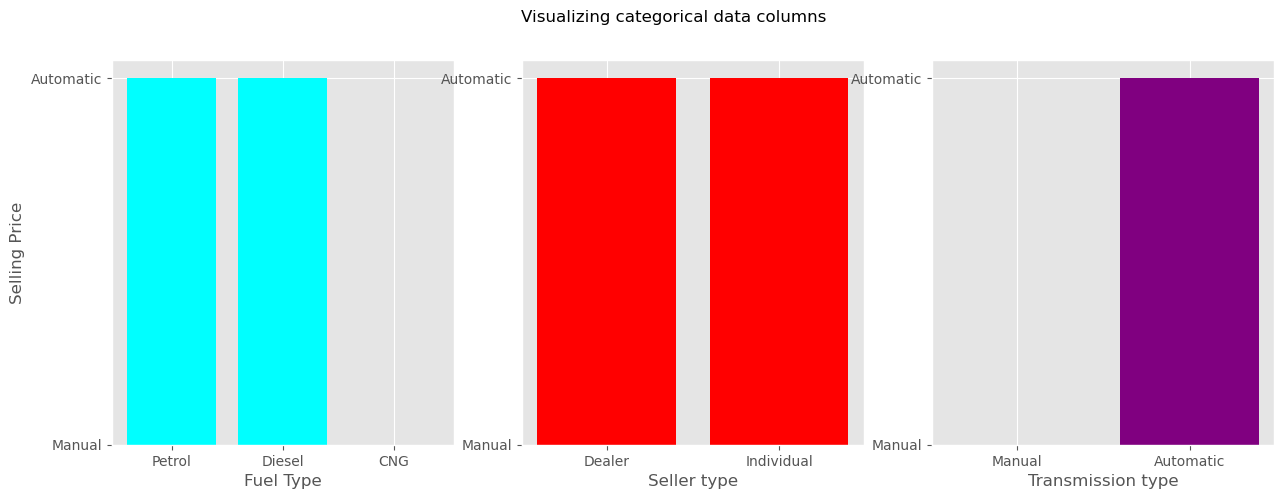

In [10]:
from matplotlib import style
style.use('ggplot')
fig = plt.figure(figsize=(15,5))
plt.suptitle('Visualizing categorical data columns')
plt.subplot(1,3,1)
plt.bar(fuel_type,selling_price,color='aqua')
plt.xlabel("Fuel Type")
plt.ylabel("Selling Price")
plt.subplot(1,3,2)
plt.bar(seller_type,selling_price,color='red')
plt.xlabel("Seller type")
plt.subplot(1,3,3)
plt.bar(transmission_type,selling_price,color='purple')
plt.xlabel('Transmission type')
plt.show()

In [11]:
petrol_data=df_car.groupby('Fuel_Type').get_group('Petrol')
petrol_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,239.000000,239.000000,239.000000,239.000000,239.000000
mean,2013.539749,3.264184,5.583556,33528.937238,0.050209
std,3.042674,3.135537,5.290685,40308.984886,0.270368
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.600000,0.940000,13850.000000,0.000000
50%,2014.000000,2.650000,4.600000,25870.000000,0.000000
75%,2016.000000,5.200000,7.980000,44271.000000,0.000000
max,2017.000000,19.750000,23.730000,500000.000000,3.000000


In [12]:
Seller_data=df_car.groupby('Seller_Type').get_group('Dealer')
Seller_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,195.000000,195.000000,195.000000,195.000000,195.000000
mean,2013.712821,6.721692,10.886308,39850.133333,0.020513
std,2.686275,5.136088,8.806563,24860.401003,0.142111
min,2003.000000,1.050000,2.690000,2071.000000,0.000000
25%,2012.000000,3.750000,6.580000,22148.500000,0.000000
50%,2014.000000,5.250000,8.500000,39485.000000,0.000000
75%,2016.000000,7.625000,13.460000,51785.500000,0.000000
max,2018.000000,35.000000,92.600000,197176.000000,1.000000


In [13]:
#one hot encoding for two colummns to convert our categorical data into Numerical data=>
df_car=pd.get_dummies(df_car,columns=['Seller_Type', 'Transmission'],drop_first=True)

In [14]:
#manual encoding for only fuel_type column=>
df_car.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)


In [17]:
df_car.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
0,ritz,maruti suzuki,2014,3.35,5.59,27000,0,0,0,1
1,sx4,maruti suzuki,2013,4.75,9.54,43000,1,0,0,1
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,0,0,0,1
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,0,0,0,1
4,swift,maruti suzuki,2014,4.60,6.87,42450,1,0,0,1


Let's Plot a head map to find the corelation between the different columns=>

C:\Users\upadh\AppData\Local\Temp\ipykernel_9968\1076560338.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_car.corr(),annot=True)


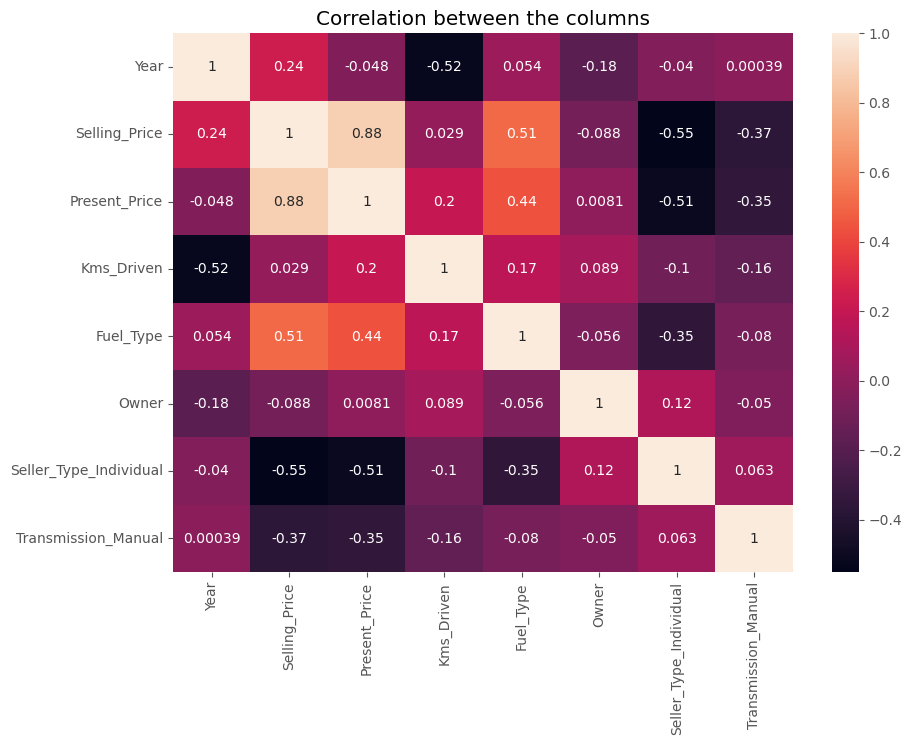

In [18]:
plt.figure(figsize=(10,7))
sns.heatmap(df_car.corr(),annot=True)
plt.title('Correlation between the columns')
plt.show()

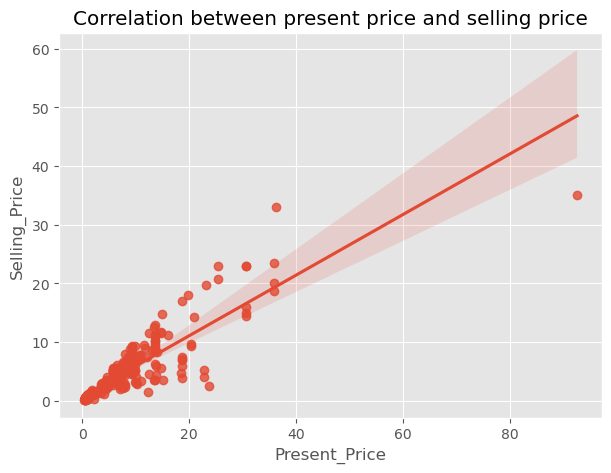

In [15]:
fig=plt.figure(figsize=(7,5))
plt.title('Correlation between present price and selling price')
sns.regplot(x='Present_Price',y='Selling_Price',data=df_car)
plt.show()

In [16]:
#Train_Test_Split=>
x=df_car.drop(['Car_Name','company','Selling_Price'],axis=1)
y=df_car['Selling_Price']

In [17]:
print(x.shape)
print(y.shape)

(301, 7)
(301,)


In [18]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [19]:
x_train

,Year,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
185,2008,0.58,1900,0,0,1,0
72,2013,18.61,56001,0,0,0,1
15,2016,10.79,43000,1,0,0,1
10,2017,3.60,2135,0,0,0,1
196,2008,0.52,500000,0,0,1,0
...,...,...,...,...,...,...,...
188,2013,0.57,18000,0,0,1,1
71,2011,12.48,45000,1,0,0,1
106,2014,3.45,16500,0,1,1,1
270,2011,10.00,69341,0,0,0,1


In [23]:
print("x_test shape:",x_test.shape)
print("y_test shape:",y_test.shape)
print("x_train shape:",x_train.shape)
print("y_train shape:",y_train.shape)

x_test shape: (91, 7)
y_test shape: (91,)
x_train shape: (210, 7)
y_train shape: (210,)


In [24]:
x_test[:5]

,Year,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
177,2016,0.57,24000,0,0,1,0
289,2016,13.60,10980,0,0,0,1
228,2012,9.40,60000,1,0,0,1
198,2011,0.57,35000,0,1,1,1
60,2013,18.61,40001,0,0,0,1


In [25]:
y_test[:5]

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
Name: Selling_Price, dtype: float64

In [26]:
y_train[:5]

185    0.25
72     7.45
15     7.75
10     2.85
196    0.17
Name: Selling_Price, dtype: float64

In [27]:
x_train[:5]

,Year,Present_Price,Kms_Driven,Fuel_Type,Owner,Seller_Type_Individual,Transmission_Manual
185,2008,0.58,1900,0,0,1,0
72,2013,18.61,56001,0,0,0,1
15,2016,10.79,43000,1,0,0,1
10,2017,3.60,2135,0,0,0,1
196,2008,0.52,500000,0,0,1,0


In [28]:
#Transform the data in Normalize(0 to 1) form =>
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [29]:
#Implement tha linear Regression=>
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [30]:
regressor.intercept_

-0.7849095604837695

In [31]:
regressor.coef_

array([ 5.17686947, 39.5293353 , -1.89006328,  2.89469687, -3.14254987,
       -1.13112818, -1.44176086])

In [32]:
#Predection
y_pred_test=regressor.predict(x_test)

In [33]:
y_test[:10]

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
9       7.45
118     1.10
154     0.50
164     0.45
33      6.00
Name: Selling_Price, dtype: float64

In [34]:
y_pred_test[:10]

array([ 2.84503948,  8.17433042,  6.15503229, -1.53474297,  9.10478102,
        7.12513416,  1.41208877,  0.85727713,  1.42824591,  7.18732696])

In [35]:
y_pred_train=regressor.predict(x_train)

In [36]:
y_train

185    0.25
72     7.45
15     7.75
10     2.85
196    0.17
       ... 
188    0.25
71     4.50
106    1.35
270    4.10
102    1.65
Name: Selling_Price, Length: 210, dtype: float64

In [37]:
y_pred_train[:10]

array([-0.02525662,  9.04423846,  8.2948583 ,  4.28697143, -1.93576605,
        4.17915158,  6.09408014,  4.36314481, -3.05986394,  7.93008424])

In [38]:
#Accuracy of training data=>
print("mae",(metrics.mean_absolute_error(y_pred_train,y_train)))
print("mse",(metrics.mean_squared_error(y_pred_train,y_train)))
print('R2 score:',(metrics.r2_score(y_pred_train,y_train)))

mae 1.1587426136420034
mse 3.0402210377501433
R2 score: 0.8586102529674601


In [39]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

In [40]:
#Accuracy of testing data=>
print("mae",(metrics.mean_absolute_error(y_pred_test,y_test)))
print("mse",(metrics.mean_squared_error(y_pred_test,y_test)))
print('R2 score:',(metrics.r2_score(y_pred_test,y_test)))

mae 1.2581404706473382
mse 3.493286026225158
R2 score: 0.8294933369778813


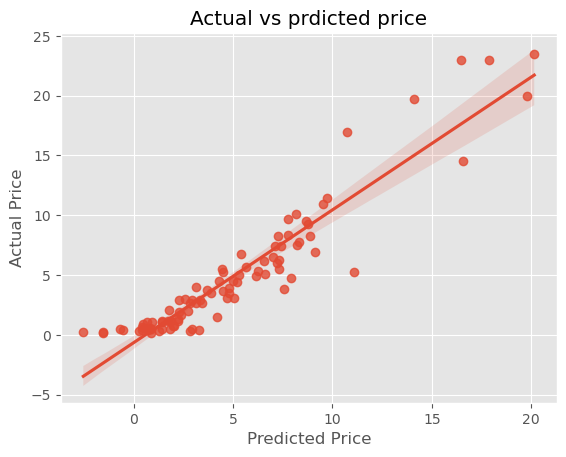

In [41]:
sns.regplot(x=y_pred_test,y=y_test)
plt.xlabel("Predicted Price")
plt.ylabel("Actual Price")
plt.title("Actual vs prdicted price")
plt.show()

In [42]:
#Ridge Regression=>
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
ridge=Ridge()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,50,55,100]}
ridge_regressor=GridSearchCV(ridge,params,scoring="neg_mean_squared_error",cv=5)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [43]:
ridge_regressor.best_params_

{'alpha': 0.01}

In [44]:
ridge_regressor.best_score_

-5.02600887466403

In [45]:
#Lasso Regression=>
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
params={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,50,55,100]}
lasso_regressor=GridSearchCV(lasso,params,scoring="neg_mean_squared_error",cv=5)
lasso_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [46]:
lasso_regressor.best_params_

{'alpha': 0.01}

In [48]:
lasso_regressor.best_score_

-4.266924832285701

In [49]:
y_pred_test=regressor.predict(x_test)
r2_score=r2_score(y_pred_test,y_test)
r2_score

0.8294933369778813